In [ ]:
#1a
#Graph A represents rotation curve for a merry-go-round. V=rw for solid disk so v is proportional to r
#Graph C represents rotation curve for planets in our solar system.  v is proportional to r^(-1/2)

In [ ]:
#1b
#M=square root(Gm(r)/r)
#The rotational speed of the galaxy increases with distance from the center of the galaxy and then levels off farther past 
#the central bulge and is a constant velocity.

In [ ]:
#1c
#it doesn not match the rotation curve from the light coming from the galaxy.

In [ ]:
# Number 2

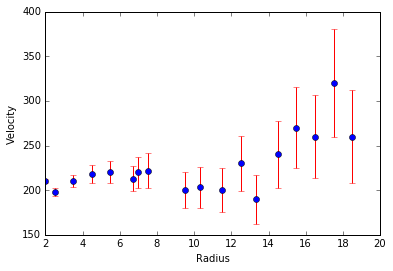

In [2]:
#part a
# Plotting Experimental data with errors bars
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

s="2 210 2.5 198 3.5 210 4.5 218 5.5 220 6.7 213 7 220 7.5 222 9.5 200 10.3 203 11.5 200 12.5 230 13.3 190 14.5 240 15.5 270 16.5 260 17.5 320 18.5 260"
data=map(float,s.split())
r=[]
v=[]

for i, x in enumerate(data):
    if i %2==0:
        r.append(x)
    else:
        v.append(x)
e=range(len(v))
        
for i in range(len(v)):
    e[i]=v[i]*0.2*(i+1)/len(v)

plt.errorbar(r, v, yerr=e, fmt='o', ecolor='r', label='velocity')
plt.ylabel('Velocity')
plt.xlabel('Radius')

[210.0, 198.0, 210.0, 218.0, 220.0, 213.0, 220.0, 222.0, 200.0, 203.0, 200.0, 230.0, 190.0, 240.0, 270.0, 260.0, 320.0, 260.0]


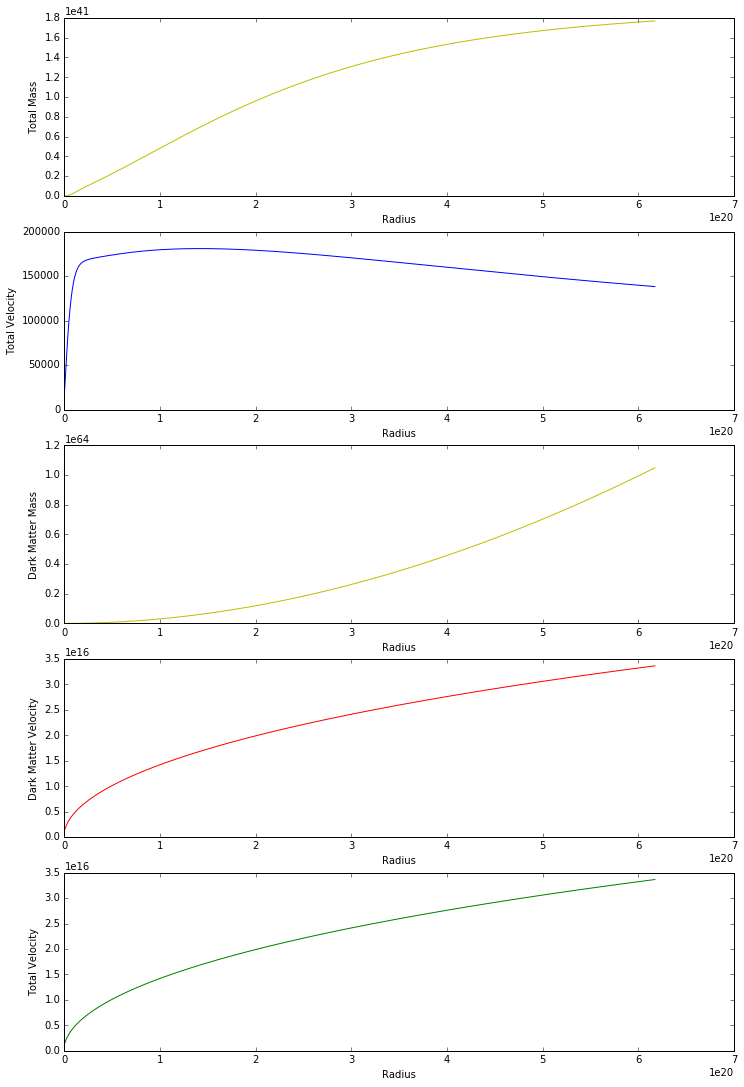

In [8]:
# 2b

import matplotlib.pyplot as plt                               
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
from math import *

Ms=1.989*(10**30)                                           
M_1= (1.3*10**10)*Ms                                                      
M_2=1E9
M_3OW=(6.5*10**10)*Ms
A_1=0.4*3.086E19
A_2=0.5
A_3=4.0*3.086E19
p_crititcal= 2.3            #(3* pow(H,2))/(8*pi*G)) 
Sc=0.3
rs=230*3.086E19



def dmdr_bulge(r):                                          # functions for mass enclosed
   
    rho1=(M_1/(4*np.pi*pow(A_1,3.0)))*((1+ (r/A_1)**2.0)**(-5/2))
    
    dmdr_b=4*np.pi*(pow(r,2))*rho1
    
    return dmdr_b


def dmdr_halo(r):
    
    rho2= (M_2*((A_2 + (r/3.086E19)))**(-3.1))*(Ms/((3.086E19)**3))
    
    dmdr_h=4*np.pi*pow(r,2)*rho2
    
    return dmdr_h


def dmdr_disk(r):
    
    rho3= (M_3OW/(2*np.pi*np.power(A_3,2.0))) * (np.exp(-(r)/A_3))
    
    dmdr_d= (2*np.pi*r)*rho3
    
    return dmdr_d


def dmdr_DarkMatter(r):
        
    rho4=(p_crititcal*Sc)/((r/rs)*(1+(r/rs))**2)
    
    dmdr_DM=4*np.pi*pow(r,2)*rho4
    
    return dmdr_DM



def velocity(L, r):                                                 
        
    v=np.sqrt((6.67E-11)*L/r)
    
    return v
print v

start = 0.1                                                         # Creating values of the radius
end = 20.0*3.086E19
samples = 1000
dr = end/samples
#y0 = [M_1,M_2,M_3OW, p_crititcal]
r=np.linspace(start, end, samples)                                  


m_bulge=[dr*dmdr_bulge(r[x]) for x in range(samples)]                 
m_halo=[dr*dmdr_halo(r[x]) for x in range(samples)]
m_disk=[(dr*dmdr_disk(r[x])) for x in range(samples)]
m_tot=[dr*(dmdr_halo(r[x])+dmdr_bulge(r[x])+dmdr_disk(r[x])) for x in range(samples)]
DM=[(dr*dmdr_DarkMatter(r[x])) for x in range(samples)]
total_mass=[dr*(dmdr_halo(r[x])+dmdr_bulge(r[x])+dmdr_disk(r[x]) + dmdr_DarkMatter(r[x])) for x in range(samples)]



for i in range(samples):                                        
    if i == 0:
        m_bulge[i] = m_bulge[i]
    else:
        m_bulge[i] += m_bulge[(i-1)]

for i in range(samples):
    if i == 0:
        m_halo[i] = m_halo[i]
    else:
        m_halo[i] += m_halo[(i-1)]
        
for i in range(samples):                                           
    if i == 0:
        m_disk[i] = m_disk[i]
    else:
        m_disk[i] += m_disk[(i-1)]        
        
for i in range(samples):
    if i == 0:
        m_tot[i] = m_tot[i]
    else:
        m_tot[i] += m_tot[(i-1)]
        
for i in range(samples):                                            
    if i == 0:
        DM[i] = DM[i]
    else:
        DM[i] += DM[(i-1)]        
               
for i in range(samples):                                              # Computing mass enclosed and storing values 
    if i == 0:
        total_mass[i] = total_mass[i]
    else:
        total_mass[i] += total_mass[(i-1)]
        
                
        
        
v_tot=[velocity(m_tot[x],r[x]) for x in range(samples)]               # Computing total velocity (no Dark Matter)
DM_velocity=[velocity(DM[x], r[x]) for x in range(samples)]           #Dark Matter velocity
total_velocity=[velocity(total_mass[x], r[x]) for x in range(samples)] # mass total plus dark matter velocity



fig= plt.figure(1, figsize=(12,30))                                   # Rotation Curves Plots

ax1 = fig.add_subplot(811)                                            #total mass vs radius
ax1.plot(r, m_tot, 'y')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Total Mass')

ax1 = fig.add_subplot(812)                                            #Total velocity vs radius
ax1.plot(r, v_tot)
ax1.set_xlabel('Radius')
ax1.set_ylabel('Total Velocity')

ax1 = fig.add_subplot(813)                                             #Dark Matter mass vs radius
ax1.plot(r, DM, 'y')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Dark Matter Mass')

ax1 = fig.add_subplot(814)                                             #Dark Matter velocity vs radius
ax1.plot(r, DM_velocity, 'r')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Dark Matter Velocity')

ax1 = fig.add_subplot(815)                                             #mass total plus Dark Matter velocity vs radius
ax1.plot(r, total_velocity, 'g')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Total Velocity')

In [7]:
#2c
#it did not fit in the data. this is due the dark mattter being wrong

In [ ]:
#2d
#I think different exponents to match the observed data